In [1]:
from super_gradients.training import Trainer


CHECKPOINT_DIR = './yolo_nas_weights'
trainer = Trainer(experiment_name='transfer_learning_object_detection_yolox', ckpt_root_dir=CHECKPOINT_DIR)

The console stream is logged into /home/suchira/sg_logs/console.log


[2023-12-31 14:40:22] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-31 14:40:23] WARNING - __init__.py - Failed to import pytorch_quantization
/home/suchira/anaconda3/envs/sam/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2023-12-31 14:40:41] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-31 14:40:41] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-31 14:40:41] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [2]:
!pip install roboflow

  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)


In [3]:
from super_gradients.training import models

yolo_nas_l = models.get("yolo_nas_s", pretrained_weights="coco")

[2023-12-31 14:40:47] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-31 14:40:48] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [4]:
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='pothole_detection_attempt_01', ckpt_root_dir="yolo_nas_weights")

In [14]:
from roboflow import Roboflow
rf = Roboflow(api_key="LbQV73oioxQFCsMTj4SG")
project = rf.workspace("brad-dwyer").project("pothole")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


RuntimeError: {
    "error": {
        "message": "Unsupported request. `GET /brad-dwyer/pothole` does not exist or cannot be loaded due to missing permissions.",
        "type": "GraphMethodException",
        "hint": "You can see your active workspace by issuing a GET request to `/` with your `api_key`."
    }
}

In [6]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

In [7]:
dataset_params = {
    'data_dir':'./data/Vehicles-OpenImages-1',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ["Ambulance" ,"Bus", "Car", "Motorcycle", "Truck"]
}

In [8]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

In [9]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

Indexing dataset annotations: 100%|██████████| 126/126 [00:00<00:00, 137.38it/s]


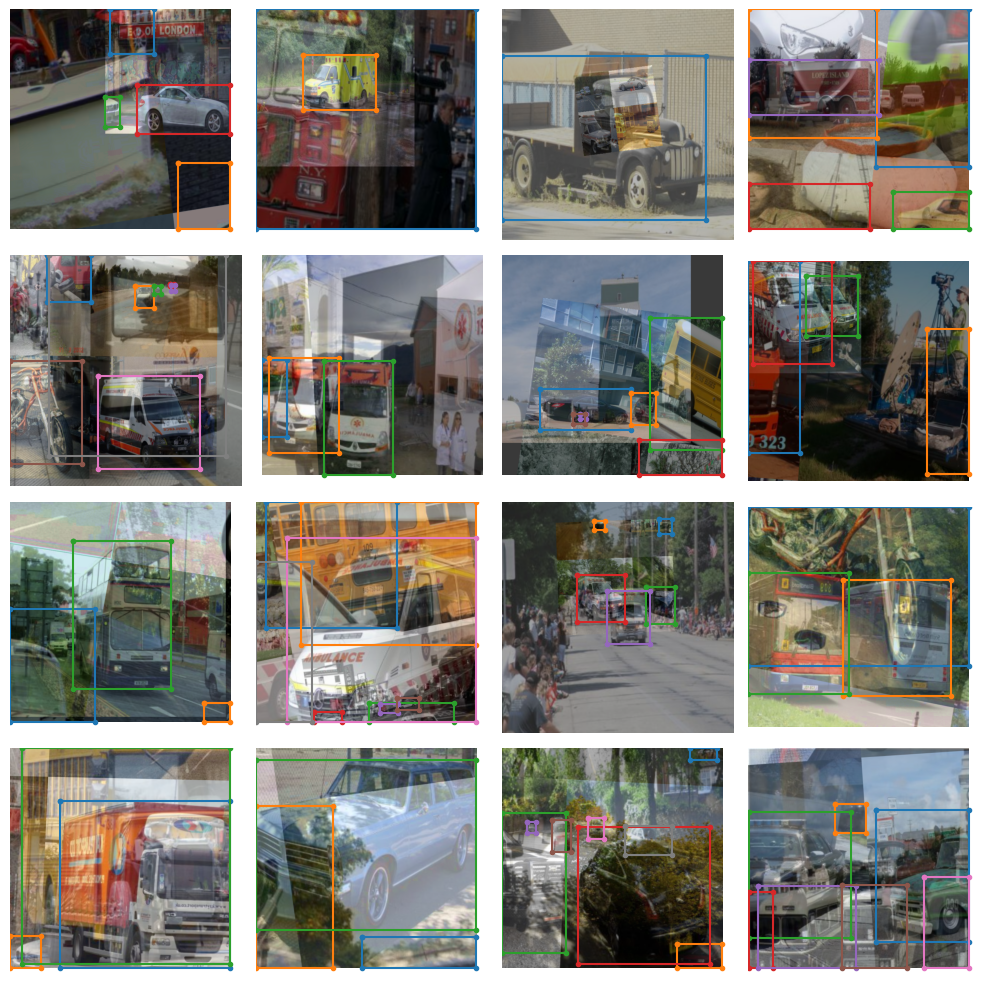

In [10]:
train_data.dataset.plot()

In [11]:
from super_gradients.training import models
model = models.get('yolo_nas_s',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2023-12-31 14:41:36] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-31 14:41:36] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [12]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 10,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [13]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2023-12-31 14:41:36] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231231_144136_536916`
[2023-12-31 14:41:36] INFO - sg_trainer.py - Checkpoints directory: yolo_nas_weights/pothole_detection_attempt_01/RUN_20231231_144136_536916
[2023-12-31 14:41:36] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to yolo_nas_weights/pothole_detection_attempt_01/RUN_20231231_144136_536916/console_Dec31_14_41_36.txt


Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
[2023-12-31 14:41:40] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            878        (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         54      

[2023-12-31 14:43:22] INFO - sg_trainer.py - 
[MODEL TRAINING EXECUTION HAS BEEN INTERRUPTED]... Please wait until SOFT-TERMINATION process finishes and saves all of the Model Checkpoints and log files before terminating...
[2023-12-31 14:43:22] INFO - sg_trainer.py - For HARD Termination - Stop the process again
[2023-12-31 14:43:22] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


In [ ]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="yolo_nas_weights/pothole_detection_attempt_01/RUN_20231231_124052_106485/average_model.pth")

[2023-12-31 12:50:47] INFO - checkpoint_utils.py - Successfully loaded model weights from yolo_nas_weights/pothole_detection_attempt_01/RUN_20231231_124052_106485/average_model.pth EMA checkpoint.


In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing:  88%|████████▊ | 7/8 [00:03<00:00,  2.30it/s]

{'PPYoloELoss/loss_cls': 1.0365729,
 'PPYoloELoss/loss_iou': 0.4068204,
 'PPYoloELoss/loss_dfl': 0.5475138,
 'PPYoloELoss/loss': 1.990907,
 'Precision@0.50': 0.024430880323052406,
 'Recall@0.50': 0.9556403160095215,
 'mAP@0.50': 0.6299432516098022,
 'F1@0.50': 0.047482188791036606}

Testing: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]


[2023-12-31 12:53:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


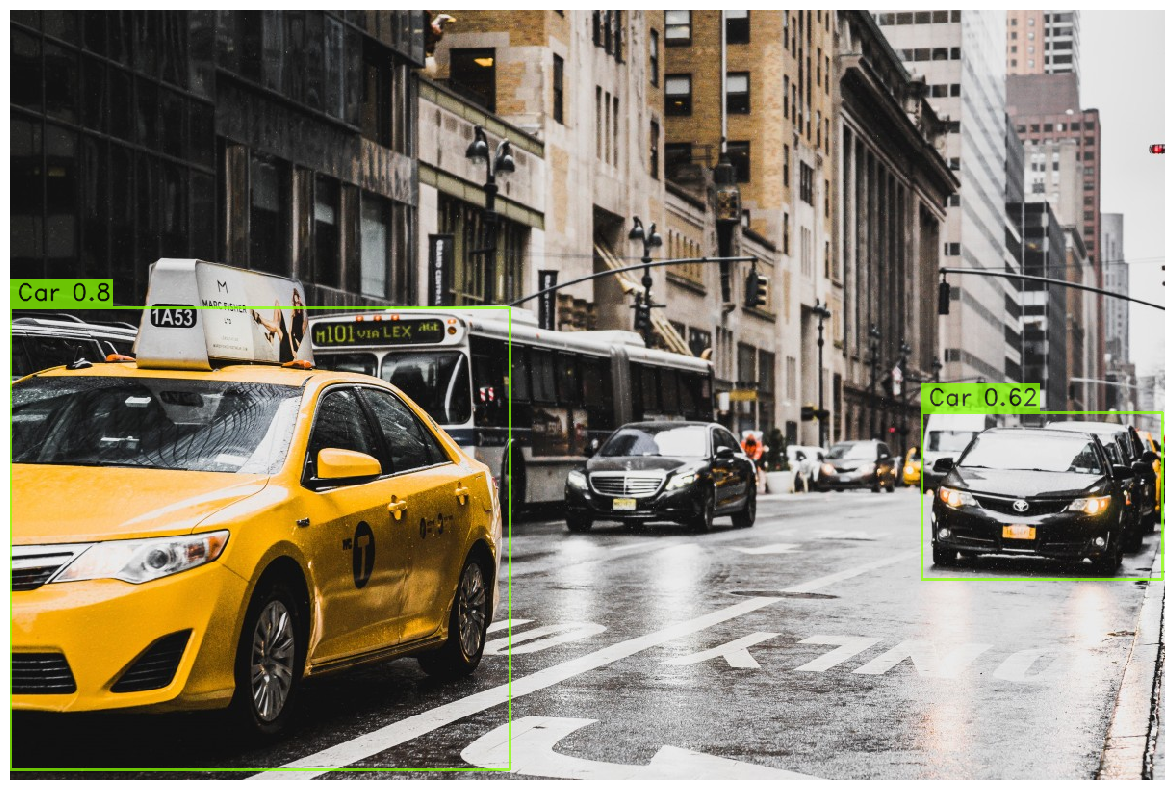

In [ ]:
img_url = 'data/cab_cars_street_urban_city-1409810.jpg!d'
best_model.predict(img_url).show()